In [1]:
#  Importando as bibliotecas
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression #  importar a regressão linear
from sklearn import tree #  importar árvore de regressão
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
#  Pegar o arquivo csv do treino
base = pd.read_csv("train.csv")

In [3]:
#  Visualizar a Tabela (Tem um arquivo chamado data_description que descreve as colunas da tabela)
base.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#  Olhar o formato
base.shape

(1460, 81)

In [5]:
#  Ver se tem Dados Duplicados (False se não tiver e True quando tiver)
base.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Length: 1460, dtype: bool

In [6]:
#  Analisar as informações dos Dados
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
#  Ver a descrição geral dos dados 
base.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
#  Ver se há Dados Faltantes(isna() e isnull())
base.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [9]:
#  Visualizando a quantidade de valores vazios
base.isnull().sum().sort_values(ascending = False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
dtype: int64

In [10]:
#  Visualizando a quantidade de valores vazios em porcentagem para cada coluna ((ascending = False) do maior ao menor)
(base.isnull().sum() / base.shape[0]).sort_values(ascending = False).head(20)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
Electrical      0.000685
Id              0.000000
dtype: float64

In [11]:
#  Vizualizando as colunas com mais de 10% de valores vazios em ordem descrescente
(base.isnull().sum() / base.shape[0]).sort_values(ascending = False).head(10) > 0.1

PoolQC          True
MiscFeature     True
Alley           True
Fence           True
MasVnrType      True
FireplaceQu     True
LotFrontage     True
GarageYrBlt    False
GarageCond     False
GarageType     False
dtype: bool

In [12]:
#  Vizualizando as colunas, para eliminar as colunas com mais de 10% de valores vazios
eliminar = base.columns[(base.isnull().sum() / base.shape[0]) > 0.1]
eliminar

Index(['LotFrontage', 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [13]:
#  Eliminando as colunas 
base = base.drop(eliminar, axis = 1)

In [14]:
#  Vizualiazar as colunas pois vou trabalhar so com as numericas 
base.dtypes

Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
Street           object
                  ...  
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
SalePrice         int64
Length: 74, dtype: object

In [15]:
#  Vizualizando as colunas para separar as numericas ver se so tem valor numerico (True)
base.dtypes != "object"

Id                True
MSSubClass        True
MSZoning         False
LotArea           True
Street           False
                 ...  
MoSold            True
YrSold            True
SaleType         False
SaleCondition    False
SalePrice         True
Length: 74, dtype: bool

In [16]:
#  Selecionando apenas as colunas numericas por nomes 
colunas = base.columns[base.dtypes != "object"]
colunas

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [17]:
#  Criando uma nova base com esses valores (loc para usado para nomes iloc numeros)
base2 = base.loc[ : , colunas]
base2.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [18]:
#  Verificando valores vazios
base2.isnull().sum().sort_values(ascending = False)

GarageYrBlt      81
MasVnrArea        8
Id                0
OpenPorchSF       0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageCars        0
GarageArea        0
WoodDeckSF        0
EnclosedPorch     0
HalfBath          0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
BedroomAbvGr      0
FullBath          0
MSSubClass        0
BsmtFinSF2        0
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
BsmtFinSF1        0
BsmtUnfSF         0
BsmtHalfBath      0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
SalePrice         0
dtype: int64

In [19]:
#  Substituindo os valores vazios por -1 (-1 é pra dizer que a informação não existia) fillna substitui os valores 
base2 = base2.fillna(-1)

In [20]:
#  Criando o Modelo
#  Selecionando X e y tirando o modelo que eu quero prever
X = base2.drop('SalePrice', axis = 1) 
y = base2.SalePrice

In [21]:
#  Separar em Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42) 

##  Regressão Linear

In [22]:
#  Criando o regressor e fazendo o fit com os dados de treino 
reg_rl = LinearRegression().fit(X_train, y_train)

In [23]:
#  Fazendo a previsão pros dados de teste
y_rl = reg_rl.predict(X_test)

##  Árvore de regressão

In [24]:
#  Criando o regressor e fazendo o fit com os dados de treino
reg_ar = tree.DecisionTreeRegressor(random_state = 42).fit(X_train, y_train)

In [25]:
#  Fazendo a previsão
y_ar = reg_ar.predict(X_test)

##  Modelo KNN

In [26]:
#  Criando o regressor e fazendo o fit com os dados de treino
reg_knn = KNeighborsRegressor(n_neighbors = 2).fit(X_train, y_train)

In [27]:
#  Fazendo a previsão
y_knn = reg_knn.predict(X_test)

##  Fazendo o Erro Médio Absoluto e o Erro Quadrático Médio para comparar os modelos

In [28]:
#  avaliando erro da regressão 
print("ERRO ABSOLUTO:", mean_absolute_error(y_test, y_rl))
print("ERRO QUADRATICO:", mean_squared_error(y_test, y_rl))

ERRO ABSOLUTO: 23763.18739306386
ERRO QUADRATICO: 1533982883.4448688


In [29]:
#  avaliando erro da árvore de decisão 
print("ERRO ABSOLUTO:", mean_absolute_error(y_test, y_ar))
print("ERRO QUADRATICO:", mean_squared_error(y_test, y_ar))

ERRO ABSOLUTO: 27580.78838174274
ERRO QUADRATICO: 2530245114.701245


In [30]:
#  avaliando erro do KNN
print("ERRO ABSOLUTO:", mean_absolute_error(y_test, y_knn))
print("ERRO QUADRATICO:", mean_squared_error(y_test, y_knn))

ERRO ABSOLUTO: 33273.08298755187
ERRO QUADRATICO: 2733937586.841286


##  Criando os Gráficos

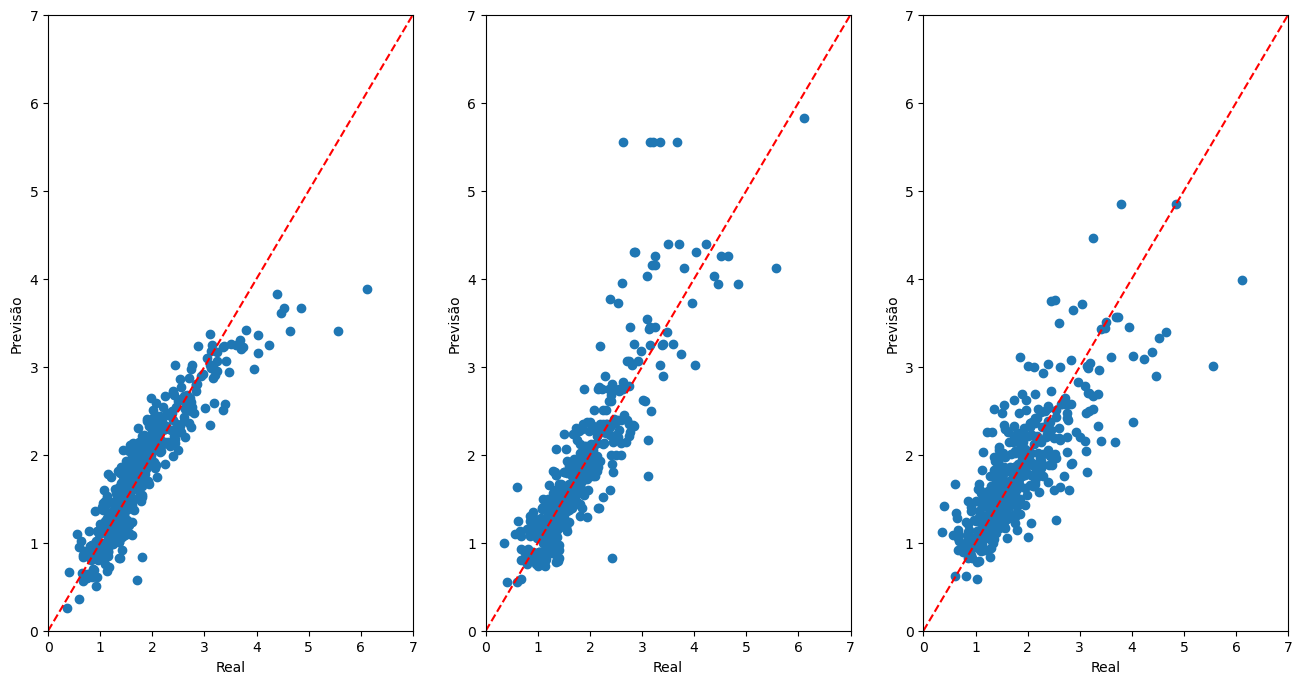

In [31]:
fig, ax = plt.subplots(ncols = 3, figsize = (16, 8))

ax[0].scatter(y_test / 100000, y_rl / 100000)
ax[0].plot([0, 700000], [0, 700000], '--r')

ax[1].scatter(y_test / 100000, y_ar / 100000)
ax[1].plot([0, 700000], [0, 700000], '--r')

ax[2].scatter(y_test / 100000, y_knn / 100000)
ax[2].plot([0, 700000], [0, 700000], '--r')



ax[0].set(xlim = (0, 7), ylim = (0, 7))
ax[0].set_xlabel('Real')
ax[0].set_ylabel('Previsão')

ax[1].set(xlim = (0, 7), ylim = (0, 7))
ax[1].set_xlabel('Real')
ax[1].set_ylabel('Previsão')

ax[2].set(xlim = (0, 7), ylim = (0, 7))
ax[2].set_xlabel('Real')
ax[2].set_ylabel('Previsão')

plt.show()
plt.close()

### Erro medio quadratico menor é melhor pois é um indicador de um modelo preditivo mais preciso e confiável e o modelo, de redressão teve o menor erro

## Fazendo a previsão para a base de teste 

In [32]:
#  importando a base de teste
teste = pd.read_csv('test.csv')

In [33]:
teste.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [34]:
#  Fazendo os mesmos processos que a base de treino 
teste = teste.drop(eliminar, axis = 1)

In [35]:
#  Verificando as colunas numericas
colunas2 = teste.columns[teste.dtypes != 'object']
colunas2

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [36]:
#  Mantendo também apenas as colunas numericas
teste = teste.loc[ : , colunas2]

In [37]:
#  Verificando a base restante
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotArea        1459 non-null   int64  
 3   OverallQual    1459 non-null   int64  
 4   OverallCond    1459 non-null   int64  
 5   YearBuilt      1459 non-null   int64  
 6   YearRemodAdd   1459 non-null   int64  
 7   MasVnrArea     1444 non-null   float64
 8   BsmtFinSF1     1458 non-null   float64
 9   BsmtFinSF2     1458 non-null   float64
 10  BsmtUnfSF      1458 non-null   float64
 11  TotalBsmtSF    1458 non-null   float64
 12  1stFlrSF       1459 non-null   int64  
 13  2ndFlrSF       1459 non-null   int64  
 14  LowQualFinSF   1459 non-null   int64  
 15  GrLivArea      1459 non-null   int64  
 16  BsmtFullBath   1457 non-null   float64
 17  BsmtHalfBath   1457 non-null   float64
 18  FullBath

In [38]:
#  Visualizando quantidade de valores vazios
teste.isnull().sum().sort_values(ascending = False).head(11)

GarageYrBlt     78
MasVnrArea      15
BsmtHalfBath     2
BsmtFullBath     2
BsmtUnfSF        1
GarageCars       1
GarageArea       1
BsmtFinSF1       1
BsmtFinSF2       1
TotalBsmtSF      1
OpenPorchSF      0
dtype: int64

In [39]:
#  Substituindo os valores vazios por -1
teste = teste.fillna(-1)

In [40]:
#  Vamos usar a regressão linear para fazer a previsão 
y_pred = reg_rl.predict(teste)
y_pred

array([122234.99595955, 139178.26368422, 169872.05425123, ...,
       175307.58803209, 106132.5314242 , 251494.07738729])

In [41]:
#  Podemos adicionar essa coluna de previsão na nossa base
teste['SalePrice'] = y_pred

In [42]:
#  E extrair somente o Id e o SalePrice
resultado = teste[['Id', 'SalePrice']]
resultado

,Id,SalePrice
0,1461,122234.995960
1,1462,139178.263684
2,1463,169872.054251
3,1464,199138.801656
4,1465,196257.109229
...,...,...
1454,2915,59584.320646
1455,2916,54459.048029
1456,2917,175307.588032
1457,2918,106132.531424


In [43]:
#  Podemos então exportar essa base 
resultado.to_csv('resultado.csv', index = False)